In [10]:
import pandas as pd
from pandas import DataFrame
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import events
import visualise
import dataset
import timestamps

data = timestamps.get_all_timestamps()
data_e = enumerate(data)

DIR = 'dataset/transformed_filled/interval_15m'

(41/62)	Showing file: 2021_67
2021_67__4-2=4-21.csv

Swarming 0: []
Queencell 0: []
Feeding 0: []
Honey 0: []
Treatment 0: []
Died 0: []
2021-04-02 00:00:00  ---  2021-04-21 00:00:00
Comment: normal april


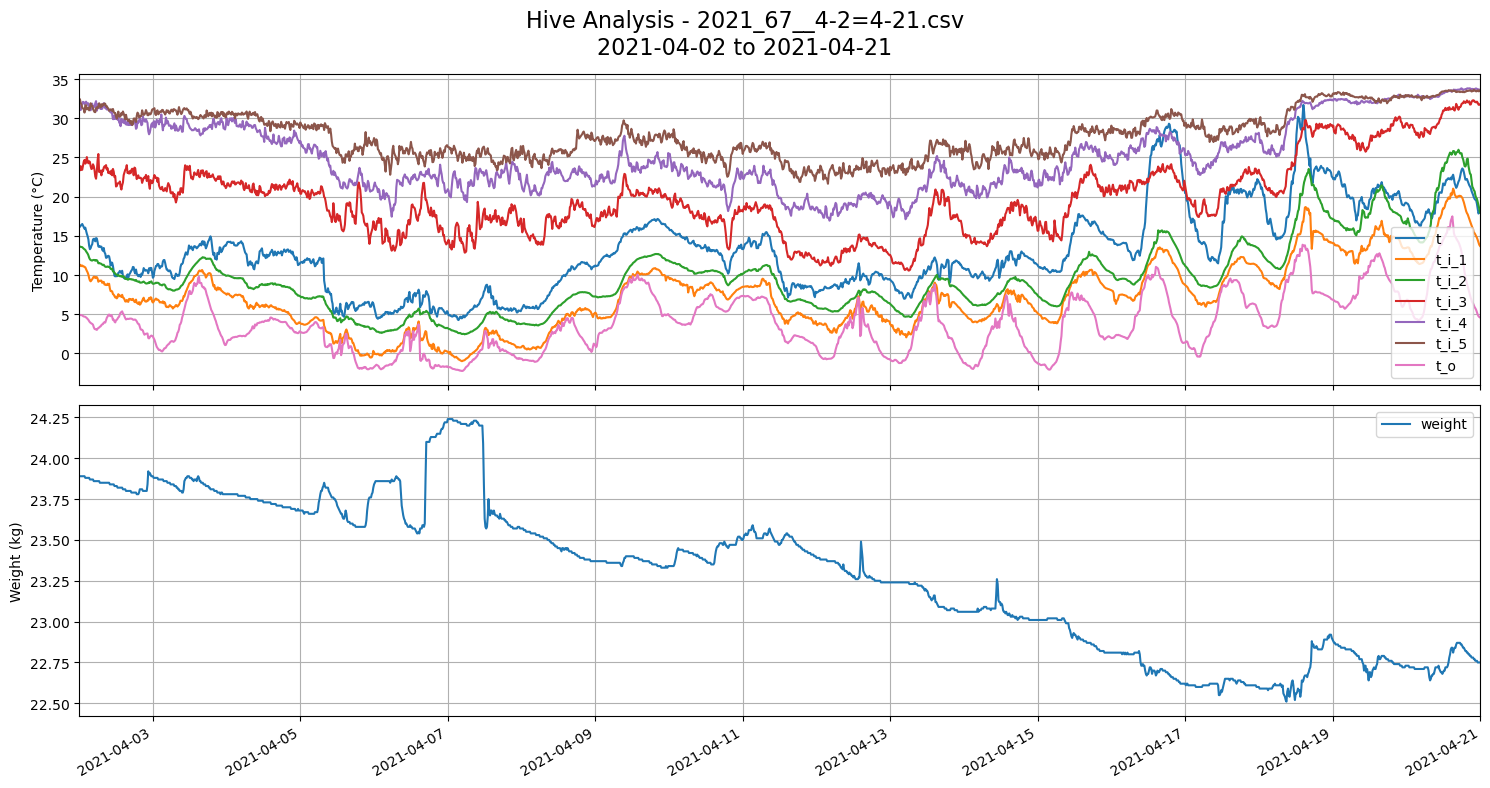

In [52]:
i, stamp = data_e.__next__()
print(f"({i}/{len(data) -1})\tShowing file: {stamp['year']}_{stamp['hive_number']}")

from_day = pd.Timestamp(stamp['date_from']).day
to_day = pd.Timestamp(stamp['date_to']).day
from_month = pd.Timestamp(stamp['date_from']).month
to_month = pd.Timestamp(stamp['date_to']).month

file = f"{stamp['year']}_{stamp['hive_number']}__{from_month}-{from_day}={to_month}-{to_day}.csv"
print(file + "\n")

df = dataset.read_dataset_file(os.path.join(DIR, file))
df = df.infer_objects(copy=False)
df[[stamp['ignore']]] = None
start_date =  df.index.min()
end_date = df.index.max()

swarming_indexes = [pd.Timestamp(ts) for ts in stamp['swarming']]
queencell_indexes = [pd.Timestamp(ts) for ts in stamp['queencell']]
feeding_indexes = [pd.Timestamp(ts) for ts in stamp['feeding']]
honey_indexes = [pd.Timestamp(ts) for ts in stamp['honey']]
treatment_indexes = [pd.Timestamp(ts) for ts in stamp['treatment']]
died_indexes = [pd.Timestamp(ts) for ts in stamp['died']]

print (f'Swarming {len(swarming_indexes)}: {swarming_indexes}')
print (f'Queencell {len(queencell_indexes)}: {queencell_indexes}')
print (f'Feeding {len(feeding_indexes)}: {feeding_indexes}')
print (f'Honey {len(honey_indexes)}: {honey_indexes}')
print (f'Treatment {len(treatment_indexes)}: {treatment_indexes}')
print (f'Died {len(died_indexes)}: {died_indexes}')
print ('========================================')
print(f"{df.index.min()}  ---  {df.index.max()}")
print(f"Comment: {stamp['comment']}")

visualise.visualise(df, start_date, end_date, file, {
    'Swarming': swarming_indexes,
    'Queencell': queencell_indexes,
    'Feeding': feeding_indexes,
    'Honey': honey_indexes,
    'Treatment': treatment_indexes,
    'Died': died_indexes
})